Autor: Aline Lopes

# Um grande banco tem o objetivo de desenvolver um modelo para identificar maior probabilidade de default. 

# Sua tarefa será realizar uma análise descritiva e tratamento dos dados para entender o perfil dos clientes e quais fatores podem influenciar no risco de crédito.

In [ ]:
! pip install pandas
! pip install numpy
! pip install seaborn
! pip install statistics
! pip install matplotlib
! pip install missingno
! pip install warnings

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import missingno as msno
import warnings 
warnings.filterwarnings("ignore")
import statistics  as sts

In [4]:
df = pd.read_csv("C:\\Users\\alope\\Documents\\Python Scripts\\Aulas_Semantix\\Estatistica descritiva\dados/risco_credito.csv")
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,signo,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,virg,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,sagi,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,libr,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,NaN,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,libr,m,NaN,0.0


In [5]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
  
show_info(df)

DATASET SHAPE:  (64592, 10) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64592 entries, 0 to 64591
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     63807 non-null  float64
 2   valor_emprestimo            63807 non-null  float64
 3   prazo_pagamento             63807 non-null  float64
 4   limite_credito              44839 non-null  float64
 5   renda                       63807 non-null  float64
 6   signo                       43825 non-null  object 
 7   genero                      57406 non-null  object 
 8   perfil_facebook             58185 non-null  object 
 9   n_emprestimos_inadiplentes  63789 non-null  float64
dtypes: float64(6), object(4)
memory usage: 4.9+ MB
None

 -----------------------------------------------

### Análise Descritiva

<AxesSubplot:>

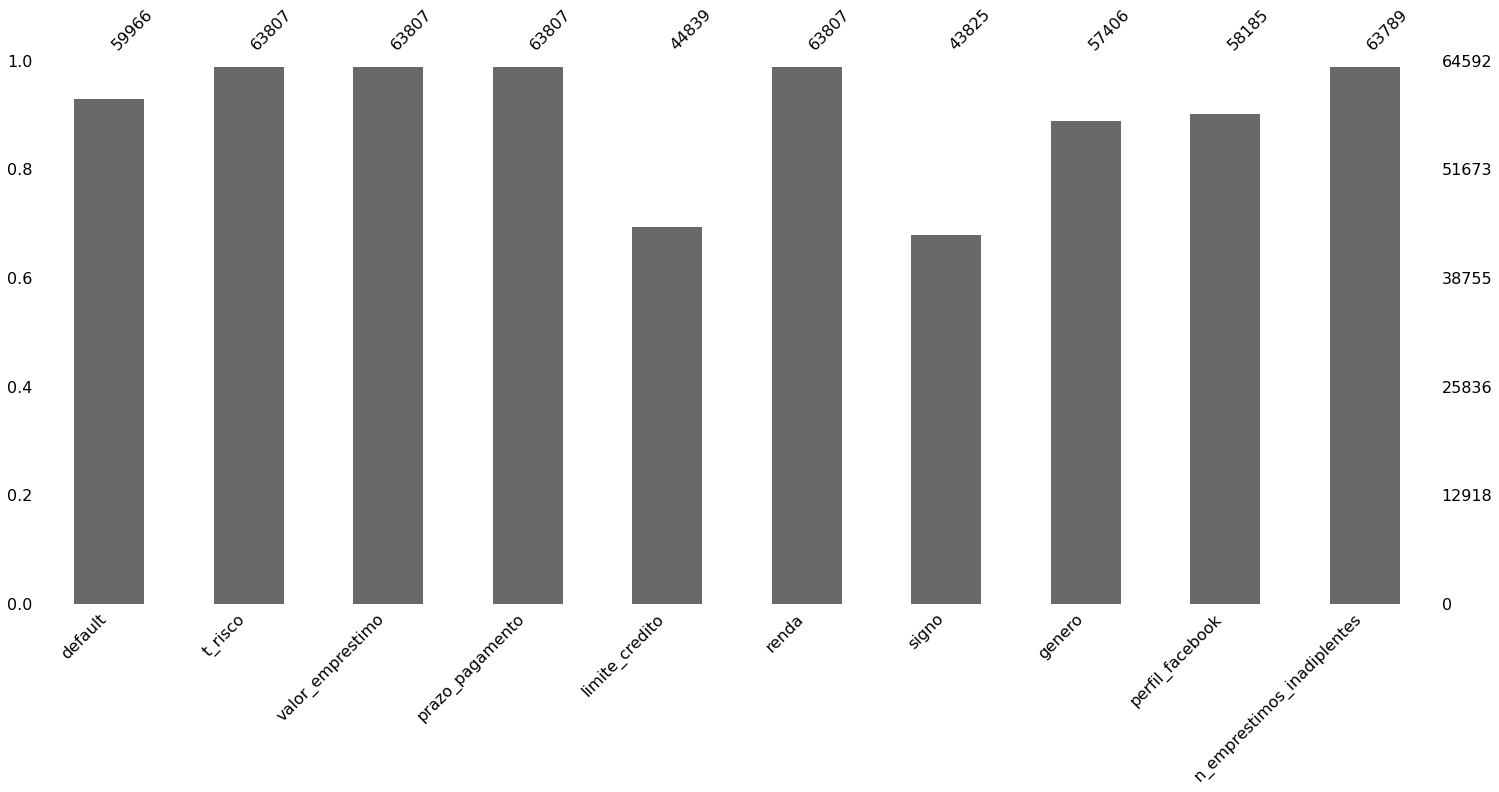

In [6]:
msno.bar(df)

# 1) excluir celular faltantes dem defaut

In [7]:
df = df.dropna(subset=["default"])

In [8]:
df.describe()


,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,59966.000000,59966.000000,59966.000000,41187.000000,5.996600e+04,59948.000000
mean,0.294114,13411.805468,40.674649,34093.005997,7.132578e+04,0.004671
std,0.101183,7957.402823,9.504775,36783.480509,5.169143e+04,0.079059
min,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000
25%,0.220000,7225.987500,36.000000,9907.000000,4.402786e+04,0.000000
50%,0.290000,12012.400000,36.000000,25338.000000,6.004726e+04,0.000000
75%,0.360000,18036.645000,36.000000,46759.500000,8.503961e+04,0.000000
max,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,5.000000


# 2) subistituir os valores faltantes quantitativos pela mediana 

In [9]:
valores_preenchimento = {'limite_credito': df['limite_credito'].median(),'n_emprestimos_inadiplentes': df['n_emprestimos_inadiplentes']}

In [10]:
df['genero'].value_counts()

m    38497
f    18473
Name: genero, dtype: int64

In [11]:
df['perfil_facebook'].value_counts()

False    33997
True     19998
Name: perfil_facebook, dtype: int64

In [12]:
df['signo'].value_counts()

libr     5582
virg     5571
cance    5541
leo      3507
gemi     3499
scor     3091
arie     3045
pisce    2992
capr     2958
aqua     2839
sagi     1402
taur     1001
Name: signo, dtype: int64

# 3) substituir os valores qualitativos faltantes (genero por M que tem maior frequencia e facebook por false, para signo não da pra substituir pq a frenquencia de varios é parecida) pela moda.


In [13]:
df['genero'] = df['genero'].fillna(df['genero'].mode()[0])
df['perfil_facebook'] = df['perfil_facebook'].fillna(df['perfil_facebook'].mode()[0])

df.isnull().sum()

default                           0
t_risco                           0
valor_emprestimo                  0
prazo_pagamento                   0
limite_credito                18779
renda                             0
signo                         18938
genero                            0
perfil_facebook                   0
n_emprestimos_inadiplentes       18
dtype: int64

# 4) Analise exploratória e tratamentos 2

dados qualitativos

In [14]:
va_nominal = ['object','bool']
qualitativas = list(df.select_dtypes(include=va_nominal).columns)
qualitativas

['default', 'signo', 'genero', 'perfil_facebook']

In [15]:
df_quali = df[qualitativas]
df_quali.head()

,default,signo,genero,perfil_facebook
0,False,virg,f,True
1,False,sagi,f,False
2,False,libr,m,True
3,False,NaN,m,False
4,False,libr,m,False


default


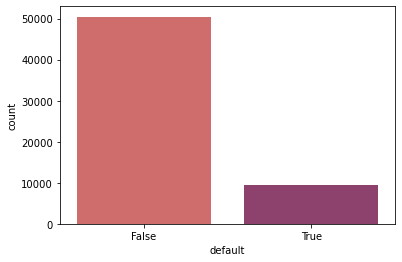

signo


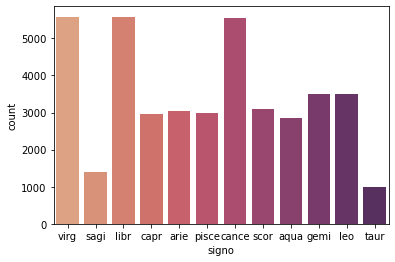

genero


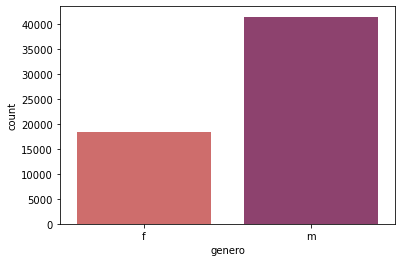

perfil_facebook


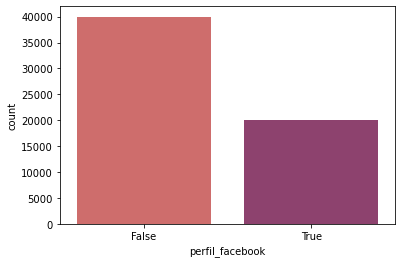

In [16]:
for va_nominal in df_quali:
  print(va_nominal)
  sns.countplot(df[va_nominal],palette='flare')
  plt.show()

Observações:
1. A variável resposta (default) está desbalanceada
2. Signo possue classes com frequencias parecidas, como tem muitos NA deve ser exluido
3. genero, o desconhecido foi substituido por masculino que apresentou a maior frenquencia
4. perfil facebbok foi substituido por falso

In [17]:
df = df.drop(columns=['signo'])
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 0 to 64591
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   default                     59966 non-null  object 
 1   t_risco                     59966 non-null  float64
 2   valor_emprestimo            59966 non-null  float64
 3   prazo_pagamento             59966 non-null  float64
 4   limite_credito              41187 non-null  float64
 5   renda                       59966 non-null  float64
 6   genero                      59966 non-null  object 
 7   perfil_facebook             59966 non-null  bool   
 8   n_emprestimos_inadiplentes  59948 non-null  float64
dtypes: bool(1), float64(6), object(2)
memory usage: 4.2+ MB


,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,n_emprestimos_inadiplentes
count,59966.000000,59966.000000,59966.000000,41187.000000,5.996600e+04,59948.000000
mean,0.294114,13411.805468,40.674649,34093.005997,7.132578e+04,0.004671
std,0.101183,7957.402823,9.504775,36783.480509,5.169143e+04,0.079059
min,0.000000,527.070000,36.000000,0.000000,4.821180e+03,0.000000
25%,0.220000,7225.987500,36.000000,9907.000000,4.402786e+04,0.000000
50%,0.290000,12012.400000,36.000000,25338.000000,6.004726e+04,0.000000
75%,0.360000,18036.645000,36.000000,46759.500000,8.503961e+04,0.000000
max,0.900000,35059.600000,60.000000,613117.000000,5.000028e+06,5.000000


In [18]:
va_quantitativa = ['float64']
quantitativas = list(df.select_dtypes(include=va_quantitativa).columns)
quantitativas

['t_risco',
 'valor_emprestimo',
 'prazo_pagamento',
 'limite_credito',
 'renda',
 'n_emprestimos_inadiplentes']

In [19]:
df_quanti = df[quantitativas]

t_risco


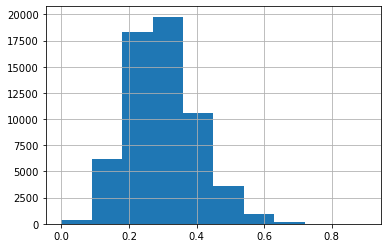

valor_emprestimo


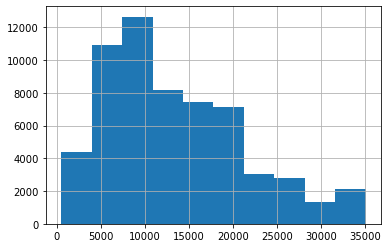

prazo_pagamento


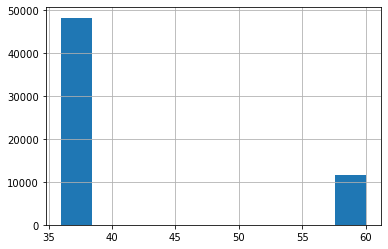

limite_credito


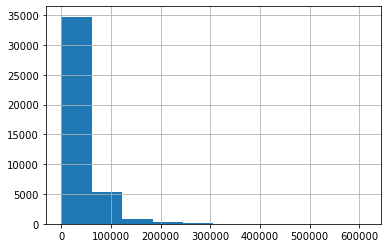

renda


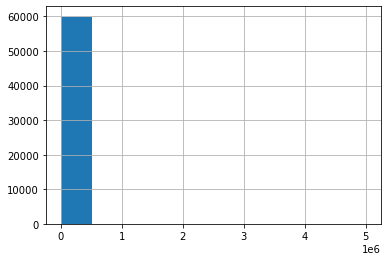

n_emprestimos_inadiplentes


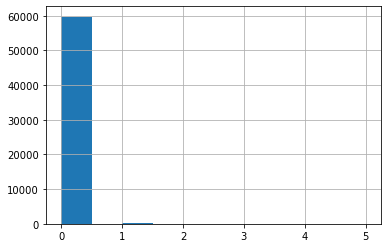

In [20]:
for va_quantitativa in df_quanti:
   print(va_quantitativa)
   df_quanti[va_quantitativa].hist(bins=10)
   plt.show()

observações sobre as variaveis quantitativas:
1. a taxa de risco está em torno de 0,3
2. 75% pediram empréstimo no valor até 18.036,60
3. 75% tem limite de crédito de até 35125 e máximo foi de 613117
4. 75% tem renda até 8.500
5. 75% não foram inadiplentes
6. o prazo só tem 2 valores pode ser tranformado em variável binária



### Análise Bivariada

**Perfil dos clientes inadiplentes**

<AxesSubplot:xlabel='perfil_facebook', ylabel='count'>

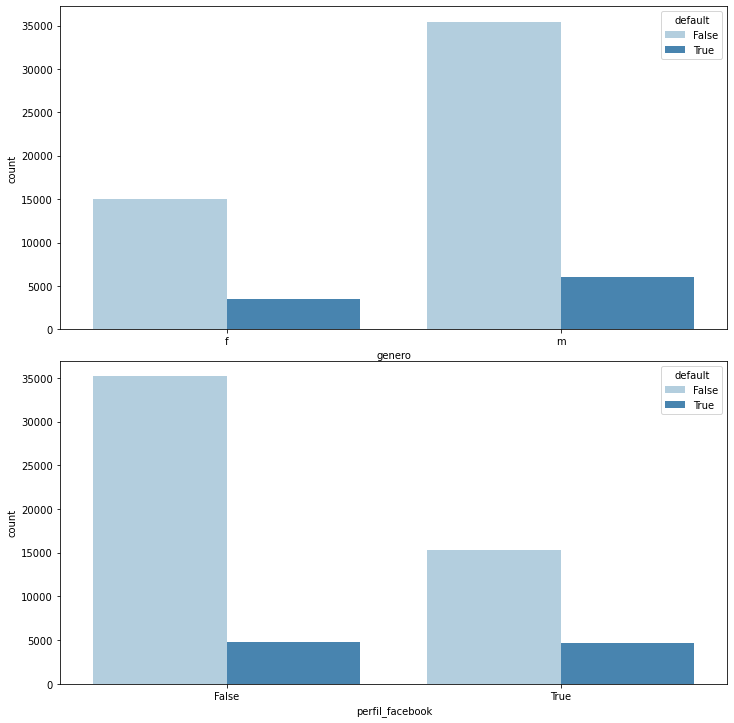

In [21]:
fig, ax =plt.subplots(2,1,figsize=(10,10))
plt.tight_layout()

sns.countplot(df['genero'], hue=df.default,ax=ax[0],palette='Blues')
sns.countplot(df['perfil_facebook'], hue=df.default,ax=ax[1],palette='Blues')

**Perfil dos clientes de acordo com variável quantitativas**

t_risco


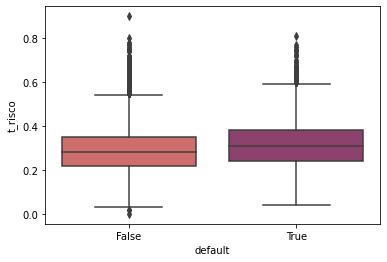

valor_emprestimo


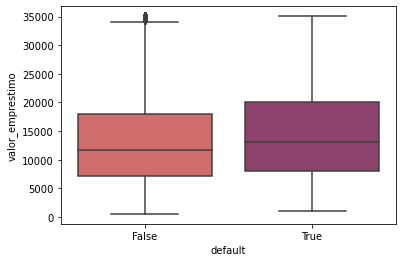

prazo_pagamento


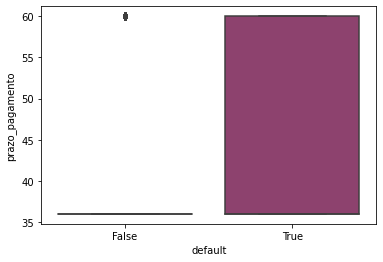

limite_credito


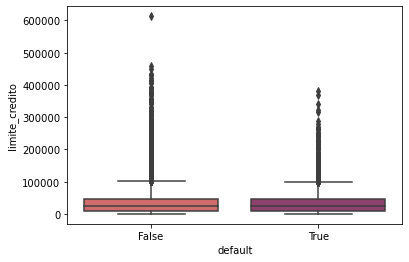

renda


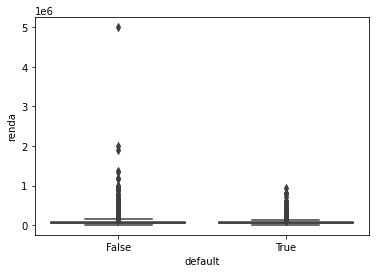

n_emprestimos_inadiplentes


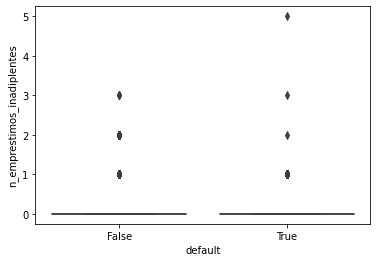

In [22]:
for va_quantitativa in df_quanti:
   print(va_quantitativa)
   sns.boxplot(y=df_quanti[va_quantitativa],x='default',data=df,palette='flare')
   plt.show()

<AxesSubplot:title={'center':'Correlacao entre as features'}>

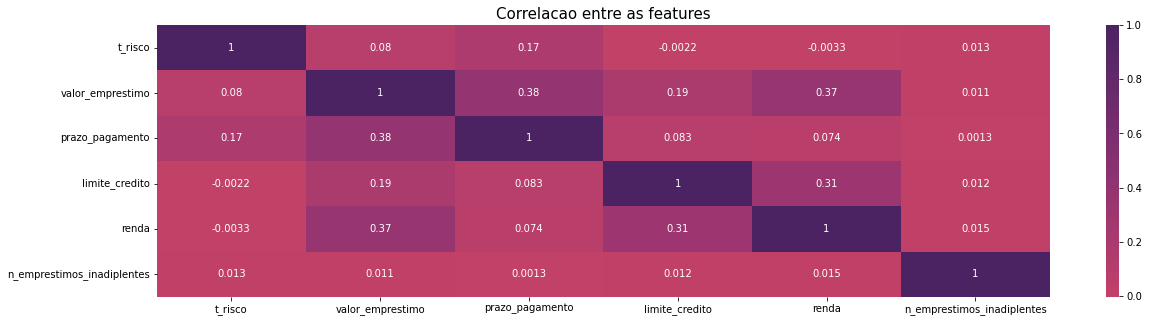

In [23]:
plt.figure(figsize=(20,5))
plt.title('Correlacao entre as features',size=15)
sns.heatmap(df_quanti.corr(),cmap='flare',center=0,annot=True)

In [24]:
df.head()

,default,t_risco,valor_emprestimo,prazo_pagamento,limite_credito,renda,genero,perfil_facebook,n_emprestimos_inadiplentes
0,False,0.43,20024.31,60.0,62386.0,59869.05,f,True,0.0
1,False,0.23,10046.51,36.0,NaN,46016.31,f,False,0.0
2,False,0.30,21228.25,60.0,NaN,48025.47,m,True,0.0
3,False,0.15,23032.33,36.0,NaN,46011.12,m,False,0.0
4,False,0.08,24026.29,36.0,32366.0,90026.17,m,False,0.0


tranformar variavies qualitativas em binárias


<Figure size 1080x504 with 0 Axes>

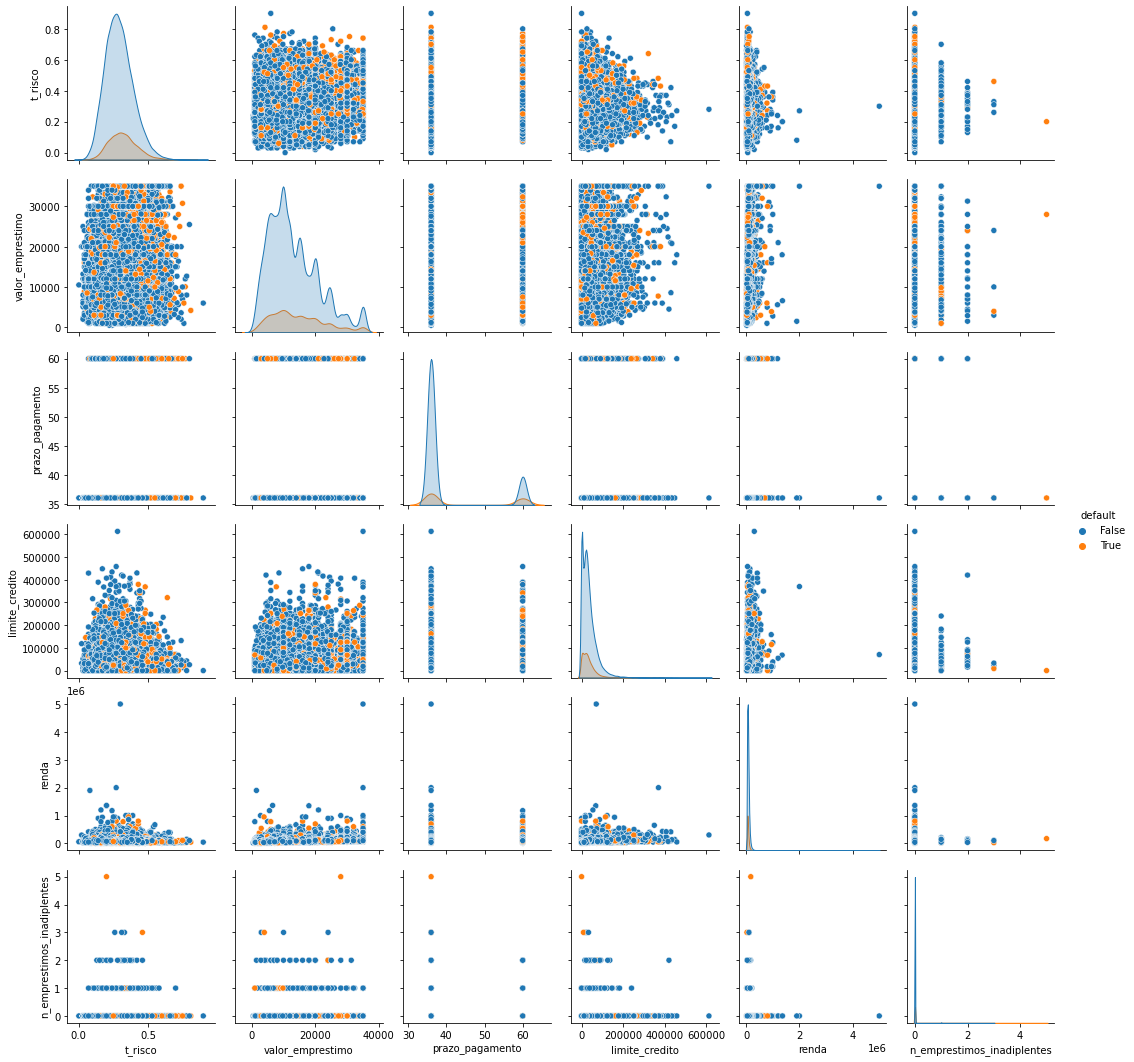

In [25]:
plt.figure(figsize=(15,7))
sns.pairplot(data=df.drop(['perfil_facebook'],axis=1),hue="default")
#sns.pairplot(data=df1,hue='default')

In [26]:
df = pd.get_dummies(df,columns=['prazo_pagamento','genero','perfil_facebook','default'],drop_first=True)

In [27]:
df.head()

,t_risco,valor_emprestimo,limite_credito,renda,n_emprestimos_inadiplentes,prazo_pagamento_60.0,genero_m,perfil_facebook_True,default_True
0,0.43,20024.31,62386.0,59869.05,0.0,1,0,1,0
1,0.23,10046.51,NaN,46016.31,0.0,0,0,0,0
2,0.30,21228.25,NaN,48025.47,0.0,1,1,1,0
3,0.15,23032.33,NaN,46011.12,0.0,0,1,0,0
4,0.08,24026.29,32366.0,90026.17,0.0,0,1,0,0


<AxesSubplot:xlabel='default_True', ylabel='t_risco'>

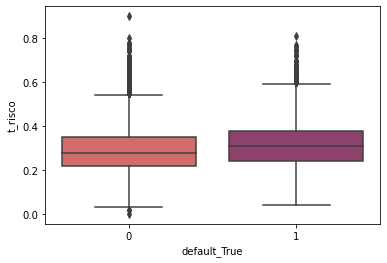

In [28]:
sns.boxplot(data=df,x="default_True",y="t_risco",palette='flare')

substituir outliers por quantil

In [29]:
out_max = df['t_risco'].quantile(0.975)
out_max

0.51

In [30]:
df.loc[df['t_risco'] > out_max,'t_risco'] = out_max

In [31]:
out_min = df['t_risco'].quantile(0.025)
out_min 

0.12

In [32]:
df.loc[df['t_risco'] < out_min,'t_risco'] = out_min

<AxesSubplot:xlabel='default_True', ylabel='t_risco'>

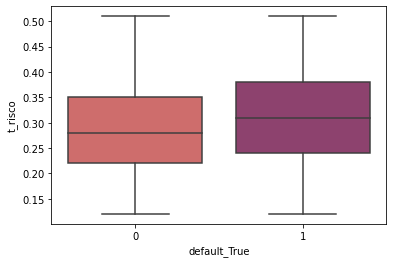

In [33]:
sns.boxplot(data=df,x="default_True",y="t_risco", palette='flare')